In [1]:
# %%
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from rich import print
from astropy.coordinates import SkyCoord
from astropy import units as u
import requests
import io
import re
import os
from astropy.io.votable import parse
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import make_lupton_rgb, simple_norm
from astropy.wcs import WCS
from reproject import reproject_interp

from astroquery.gaia import Gaia
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

# Load Known

In [3]:
hdul = fits.open("./data/lensedquasars.fits")
hdul.info()

Filename: ./data/lensedquasars.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     26   220R x 9C   [D, D, 17A, 11A, 15A, 5A, K, 13A, 13A]   


In [4]:
data = hdul[1].data
table_known = Table(data)
# table_known['W12'] = np.float(table_known['W1']) - np.float(table_known['W2'])
table_known

RA,DEC,Name,z_qso,z_lens,separation,N_images,W1,W2
float64,float64,str17,str11,str15,str5,int64,str13,str13
2.83435,-8.7643,J0011-0845,1.7,-,1.89,2,15.1899995804,14.4549999237
3.348077,51.3183,J0013+5119,2.63,-,2.92,2,14.6770000458,13.9200000763
7.09369,6.5317,PSJ0028+0631,1.06,-,2.81,2,14.1599998474,13.3629999161
7.5636,-15.4177,PSJ0030-1525,3.36,measured,1.78,4,14.3120002747,13.7609996796
11.9465943,25.2411,J0047+2514,1.20,-,1.73,2,14.9420003891,14.2690000534
12.6158,-17.6693,HE0047-1756,1.678,0.407,1.43,2,12.9110002518,11.5860004425
13.4349,-20.2091,DESJ0053-2012,3.8,observed,3.06,4,14.5620002747,14.0120000839
15.69675,24.7544,J0102+2445,2.085,0.272?,2.38,2,14.1879997253,13.5659999847
18.141188,-16.840955,DESJ0112-1650,0.99,0.54,1.38,2,14.3559999466,13.6920003891


In [5]:
df_lemon_gaia = pd.read_csv("data/table_objsearch_div.csv")
df_lemon_gaia

,No.,Object Name,RA,Dec,Object Type,cz (Velocity),Redshift (z),z flag,Reference,Note,Photometry,Position,Redshift,Diameter,Distances,Classification,Images,Spectra
0,1,"<a HREF=""#"" onclick=""getObjectSearchInfo(jQuer...",41.679340,-1.530498,QSO,150601.0,0.50235,SLS,11,0,21,7,5,0,0,1,0,0
1,2,"<a HREF=""#"" onclick=""getObjectSearchInfo(jQuer...",201.740958,30.340004,G,555216.0,1.85200,SLS,5,0,29,4,3,4,0,0,0,0
2,3,"<a HREF=""#"" onclick=""getObjectSearchInfo(jQuer...",188.421926,-2.460545,G,103428.0,0.34500,SLS?,1,0,1,2,1,0,0,0,0,0
3,4,"<a HREF=""#"" onclick=""getObjectSearchInfo(jQuer...",47.702910,-55.753462,G,692521.0,2.31000,SLS,1,0,19,4,1,0,0,0,0,0
4,5,"<a HREF=""#"" onclick=""getObjectSearchInfo(jQuer...",8.113022,-45.388420,G,NaN,NaN,NaN,2,0,17,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,562,"<a HREF=""#"" onclick=""getObjectSearchInfo(jQuer...",326.995700,-13.677200,Q_Lens,414313.0,1.38200,SLS,1,0,0,1,1,0,0,0,0,0
562,563,"<a HREF=""#"" onclick=""getObjectSearchInfo(jQuer...",331.434300,-37.450400,QGroup,554016.0,1.84800,SLS,1,0,0,1,1,0,0,0,0,0
563,564,"<a HREF=""#"" onclick=""getObjectSearchInfo(jQuer...",331.434300,-37.450400,Q_Lens,554016.0,1.84800,SLS,1,0,0,1,1,0,0,0,0,0
564,565,"<a HREF=""#"" onclick=""getObjectSearchInfo(jQuer...",331.434300,-37.450400,Q_Lens,554016.0,1.84800,SLS,1,0,0,1,1,0,0,0,0,0


In [6]:
def get_name(row):
    return row['Object Name'].split('>')[1].split('<')[0]

df_lemon_gaia['Name'] = df_lemon_gaia.apply(get_name, axis=1)
df_lemon_gaia

,No.,Object Name,RA,Dec,Object Type,cz (Velocity),Redshift (z),z flag,Reference,Note,Photometry,Position,Redshift,Diameter,Distances,Classification,Images,Spectra,Name
0,1,"<a HREF=""#"" onclick=""getObjectSearchInfo(jQuer...",41.679340,-1.530498,QSO,150601.0,0.50235,SLS,11,0,21,7,5,0,0,1,0,0,WISEA J024643.04-013149.7
1,2,"<a HREF=""#"" onclick=""getObjectSearchInfo(jQuer...",201.740958,30.340004,G,555216.0,1.85200,SLS,5,0,29,4,3,4,0,0,0,0,WISEA J132657.83+302024.0
2,3,"<a HREF=""#"" onclick=""getObjectSearchInfo(jQuer...",188.421926,-2.460545,G,103428.0,0.34500,SLS?,1,0,1,2,1,0,0,0,0,0,APMUKS(BJ) B123107.12-021105.7
3,4,"<a HREF=""#"" onclick=""getObjectSearchInfo(jQuer...",47.702910,-55.753462,G,692521.0,2.31000,SLS,1,0,19,4,1,0,0,0,0,0,WISEA J031048.69-554512.4
4,5,"<a HREF=""#"" onclick=""getObjectSearchInfo(jQuer...",8.113022,-45.388420,G,NaN,NaN,NaN,2,0,17,5,0,0,0,0,0,0,WISEA J003227.12-452318.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,562,"<a HREF=""#"" onclick=""getObjectSearchInfo(jQuer...",326.995700,-13.677200,Q_Lens,414313.0,1.38200,SLS,1,0,0,1,1,0,0,0,0,0,[LAA2023] J2147-1340 BG2
562,563,"<a HREF=""#"" onclick=""getObjectSearchInfo(jQuer...",331.434300,-37.450400,QGroup,554016.0,1.84800,SLS,1,0,0,1,1,0,0,0,0,0,[LAA2023] J2205-3727
563,564,"<a HREF=""#"" onclick=""getObjectSearchInfo(jQuer...",331.434300,-37.450400,Q_Lens,554016.0,1.84800,SLS,1,0,0,1,1,0,0,0,0,0,[LAA2023] J2205-3727 BG1
564,565,"<a HREF=""#"" onclick=""getObjectSearchInfo(jQuer...",331.434300,-37.450400,Q_Lens,554016.0,1.84800,SLS,1,0,0,1,1,0,0,0,0,0,[LAA2023] J2205-3727 BG2


In [7]:
candidaye_types = df_lemon_gaia['Object Type'].unique()
candidaye_types

array(['QSO', 'G', '*', 'UvS', 'IrS', 'Q_Lens', 'QGroup', 'Other',
       'GPair', 'G_Lens', 'VisS', '**'], dtype=object)

In [8]:
cond = df_lemon_gaia['Object Type'] == 'Q_Lens'
df_lemon_gaia = df_lemon_gaia[cond].reset_index(drop=True)
df_lemon_gaia

,No.,Object Name,RA,Dec,Object Type,cz (Velocity),Redshift (z),z flag,Reference,Note,Photometry,Position,Redshift,Diameter,Distances,Classification,Images,Spectra,Name
0,69,"<a HREF=""#"" onclick=""getObjectSearchInfo(jQuer...",51.5284,-31.3816,Q_Lens,399983.0,1.3342,SUN,2,0,0,2,2,0,0,0,0,0,WISE J0326-3122:[SMC2017] A
1,70,"<a HREF=""#"" onclick=""getObjectSearchInfo(jQuer...",51.5284,-31.3816,Q_Lens,399803.0,1.3336,SUN,2,0,0,2,2,0,0,0,0,0,WISE J0326-3122:[SMC2017] B
2,84,"<a HREF=""#"" onclick=""getObjectSearchInfo(jQuer...",126.5341,70.0456,Q_Lens,485064.0,1.6180,SLS,1,0,0,1,1,0,0,0,0,0,[LAA2023] J0826+7002 BG2
3,87,"<a HREF=""#"" onclick=""getObjectSearchInfo(jQuer...",150.7886,6.8501,Q_Lens,768968.0,2.5650,SLS,1,0,0,1,1,0,0,0,0,0,[LAA2023] J1003+0651 BG1
4,88,"<a HREF=""#"" onclick=""getObjectSearchInfo(jQuer...",150.7886,6.8501,Q_Lens,768968.0,2.5650,SLS,1,0,0,1,1,0,0,0,0,0,[LAA2023] J1003+0651 BG2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,552,"<a HREF=""#"" onclick=""getObjectSearchInfo(jQuer...",317.5016,-37.9183,Q_Lens,449689.0,1.5000,SLS,1,0,0,1,1,0,0,0,0,0,[LAA2023] J2110-3755 BG2
180,561,"<a HREF=""#"" onclick=""getObjectSearchInfo(jQuer...",326.9957,-13.6772,Q_Lens,414313.0,1.3820,SLS,1,0,0,1,1,0,0,0,0,0,[LAA2023] J2147-1340 BG1
181,562,"<a HREF=""#"" onclick=""getObjectSearchInfo(jQuer...",326.9957,-13.6772,Q_Lens,414313.0,1.3820,SLS,1,0,0,1,1,0,0,0,0,0,[LAA2023] J2147-1340 BG2
182,564,"<a HREF=""#"" onclick=""getObjectSearchInfo(jQuer...",331.4343,-37.4504,Q_Lens,554016.0,1.8480,SLS,1,0,0,1,1,0,0,0,0,0,[LAA2023] J2205-3727 BG1


In [17]:
df_known = pd.read_csv("data/known_gls.csv")
df_known['z_qso'].replace('-', np.nan, inplace=True)
df_known['z_qso'] = df_known['z_qso'].astype(float)

/var/folders/z7/xdmr6nzd7tbdjw0hjsyc05l00000gn/T/ipykernel_13989/4085785643.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_known['z_qso'].replace('-', np.nan, inplace=True)


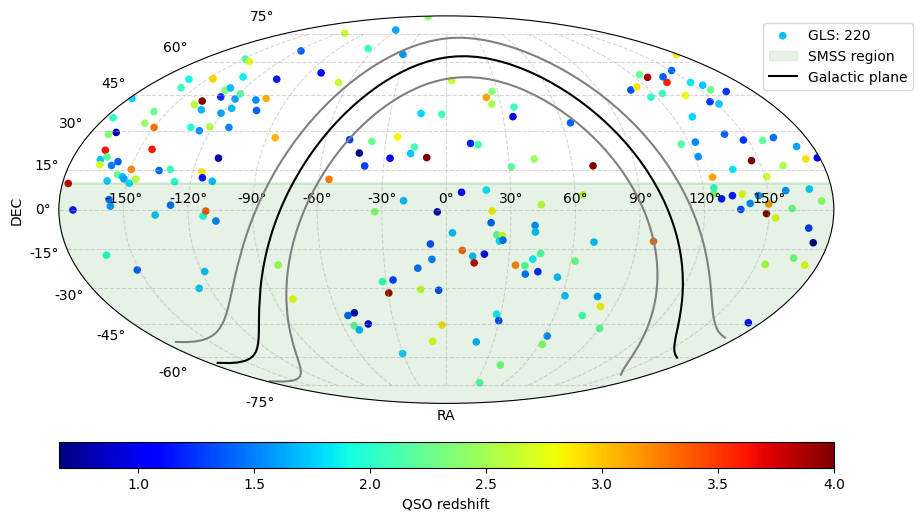

In [44]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, 
                 projection="mollweide"
                 )
coords = SkyCoord(ra=df_lemon_gaia['RA'], 
                      dec=df_lemon_gaia['Dec'], unit=(u.degree, u.degree),
                      frame='icrs'
                      )

# plt.scatter(coords.ra.wrap_at(180 * u.deg).radian,
#             coords.dec.radian, 
#             s=10, label=f'{'Q_lens'}: {len(coords)}',
#             c=plt.cm.tab10(1))

coords = SkyCoord(ra=df_known['RA'], 
                      dec=df_known['DEC'], unit=(u.degree, u.degree),
                      frame='icrs'
                      )
colors = plt.cm.jet(df_known['z_qso'].astype(float))
colors = np.where(df_known['z_qso'] > 4, 4, df_known['z_qso'])
plt.scatter(coords.ra.wrap_at(180 * u.deg).radian,
            coords.dec.radian, 
            s=20, label=f'{'GLS'}: {len(coords)}',
            c=colors, cmap='jet')

# Fill between dec=15 and dec=-90
ra = np.linspace(-180, 180, 100)
ax.fill_between(np.deg2rad(ra), np.radians(10), np.radians(-90), color='green', 
                alpha=0.1, transform=ax.transData,
                label='SMSS region')

# Galactic plane
l = np.linspace(-60, 290, 100)
b = np.zeros(100)
b1 = np.ones(100) * 10
b2 = np.ones(100) * -10
gc = SkyCoord(l=l*u.degree, b=b*u.degree, frame='galactic')
gc1 = SkyCoord(l=l*u.degree, b=b1*u.degree, frame='galactic')
gc2 = SkyCoord(l=l*u.degree, b=b2*u.degree, frame='galactic')

ax.plot(gc.icrs.ra.wrap_at(180*u.degree).radian, gc.icrs.dec.radian,
        # marker='.',
        color='black', label='Galactic plane')
# ax.fill_between(gc1.icrs.ra.wrap_at(180*u.degree).radian, gc1.icrs.dec.radian, gc2.icrs.dec.radian,
#                 color='black', alpha=0.2)
ax.plot(gc1.icrs.ra.wrap_at(180*u.degree).radian, gc1.icrs.dec.radian, color='gray')
ax.plot(gc2.icrs.ra.wrap_at(180*u.degree).radian, gc2.icrs.dec.radian, color='gray')

plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend(bbox_to_anchor=(0.9, 1.0), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.colorbar(label='QSO redshift', orientation='horizontal', pad=0.05,
             aspect=30)
plt.savefig('figs/know_lensed_quasars_sky_distribution.png',
            bbox_inches='tight', facecolor='white')
plt.show()

# Merge known and new Gaia DR2 sources

In [10]:
df_lemon_gaia.columns

Index(['No.', 'Object Name', 'RA', 'Dec', 'Object Type', 'cz (Velocity)',
       'Redshift (z)', 'z flag', 'Reference', 'Note', 'Photometry', 'Position',
       'Redshift', 'Diameter', 'Distances', 'Classification', 'Images',
       'Spectra', 'Name'],
      dtype='object')

In [ ]:
table_known[['Name', 'RA', 'DEC', 'z_lens', 'z_qso']].to_pandas()

,Name,RA,DEC,z_lens,z_qso
0,J0011-0845,2.834350,-8.764300,-,1.7
1,J0013+5119,3.348077,51.318300,-,2.63
2,PSJ0028+0631,7.093690,6.531700,-,1.06
3,PSJ0030-1525,7.563600,-15.417700,measured,3.36
4,J0047+2514,11.946594,25.241100,-,1.20
...,...,...,...,...,...
215,PSJ2332-1852,353.080500,-18.868500,-,1.49
216,ULASJ2343-0050,355.799750,-0.842860,0.3?,0.787
217,WISE2344-3056,356.070600,-30.940560,1.30?,1.298
218,DESJ2349-4518,357.491900,-45.314700,-,2.89


In [22]:
# df_gls = pd.DataFrame(columns=['name', 'ra', 'dec', 'z_lens', 'z_qso'])
# df_gls['name'] = df_lemon_gaia['Name']
# df_gls['ra'] = df_lemon_gaia['RA']
# df_gls['dec'] = df_lemon_gaia['Dec']
# df_gls['z_qso'] = df_lemon_gaia['Redshift (z)']

# df = table_known[['Name', 'RA', 'DEC', 'z_lens', 'z_qso']].to_pandas()
# df.rename(columns={'Name': 'name', 'RA': 'ra', 'DEC': 'dec'}, inplace=True)
# df_gls = pd.concat([df_gls, df], ignore_index=True)
df_gls = table_known.to_pandas()
df_gls

,RA,DEC,Name,z_qso,z_lens,separation,N_images,W1,W2
0,2.834350,-8.764300,J0011-0845,1.7,-,1.89,2,15.1899995804,14.4549999237
1,3.348077,51.318300,J0013+5119,2.63,-,2.92,2,14.6770000458,13.9200000763
2,7.093690,6.531700,PSJ0028+0631,1.06,-,2.81,2,14.1599998474,13.3629999161
3,7.563600,-15.417700,PSJ0030-1525,3.36,measured,1.78,4,14.3120002747,13.7609996796
4,11.946594,25.241100,J0047+2514,1.20,-,1.73,2,14.9420003891,14.2690000534
...,...,...,...,...,...,...,...,...,...
215,353.080500,-18.868500,PSJ2332-1852,1.49,-,1.97,2,14.7440004349,13.7869997025
216,355.799750,-0.842860,ULASJ2343-0050,0.787,0.3?,1.32,2,14.6470003128,13.6859998703
217,356.070600,-30.940560,WISE2344-3056,1.298,1.30?,2.18,4,14.7580003738,13.888999939
218,357.491900,-45.314700,DESJ2349-4518,2.89,-,2.11,2,14.9390001297,14.3219995499


# Get SkyMapper GLS tables

In [ ]:
size = 10.0/3600.0
bands = 'g,r,i,z'
for i, row in df_gls.iterrows():
    ra = row['RA']
    dec = row['DEC']
    gls_name = row['Name']
    query = f"https://api.skymapper.nci.org.au/public/siap/dr4/query?POS={ra},{dec}&SIZE={size}&BAND={bands}&FORMAT=GRAPHIC&VERB=3"
    res = requests.get(query)
    # print(i, res.status_code)

    votable = parse(io.BytesIO(res.content))
    table = votable.get_first_table()
    names = [name for name in table.to_table().colnames if len(table.to_table()[name].shape) <= 1]
    df_images_list = table.to_table()[names].to_pandas()
    if len(df_images_list) == 0:
        df_gls.loc[i, 'smss'] = True
    else:
        df_gls.loc[i, 'smss'] = False
        
    df_images_list.sort_values(by=['band', 'exptime', 'mean_fwhm'], inplace=True)
    df_images_list.to_csv(f'data/known/table/{row["Name"]}.csv', index=False)
    # df_best_images.loc[i, 'Name'] = row['Name']

    # for band in df_images_list['band'].unique():
    #     # Select only band images
    #     cond = df_images_list['band'] == band
    #     df = df_images_list.loc[cond]
    #     # Select the the image with the biggest exposure time
    #     max_exp = df['exptime'].max()
    #     cond = df['exptime'] == max_exp
    #     df = df[cond]
    #     # Select the image with the smallest FWHM
    #     idx = df['mean_fwhm'].idxmin()
    #     df_best_images.loc[i, band] = df.loc[idx, 'preview']

    # plt.figure(figsize=(20, 5))
    # for j, band in enumerate(df_best_images.columns):
    #     img_data = requests.get(df_best_images.loc[0, band]).content
    #     plt.subplot(1, 4, j+1)
    #     plt.imshow(plt.imread(io.BytesIO(img_data)))
    #     plt.title(band)
    #     plt.axis('off')
    # plt.tight_layout()
    # plt.savefig('figs/)
    # plt.show()
    # break
# df_best_images
df_gls.to_csv('data/known_gls.csv', index=False)
    

# Check SkyMapper GLS data 

In [3]:
df_gls = pd.read_csv('data/known_gls.csv', index_col='Name')
df_gls

,RA,DEC,z_qso,z_lens,separation,N_images,W1,W2,smss
Name,,,,,,,,,
J0011-0845,2.834350,-8.764300,1.7,-,1.89,2,15.190,14.455,False
J0013+5119,3.348077,51.318300,2.63,-,2.92,2,14.677,13.920,True
PSJ0028+0631,7.093690,6.531700,1.06,-,2.81,2,14.160,13.363,False
PSJ0030-1525,7.563600,-15.417700,3.36,measured,1.78,4,14.312,13.761,False
J0047+2514,11.946594,25.241100,1.20,-,1.73,2,14.942,14.269,True
...,...,...,...,...,...,...,...,...,...
PSJ2332-1852,353.080500,-18.868500,1.49,-,1.97,2,14.744,13.787,False
ULASJ2343-0050,355.799750,-0.842860,0.787,0.3,1.32,2,14.647,13.686,False
WISE2344-3056,356.070600,-30.940560,1.298,1.30,2.18,4,14.758,13.889,False


In [3]:
df_images = pd.read_csv('data/dr4_images.csv')
df_images

,image_id,night_mjd,date,ra,decl,field_id,exp_time,airmass,filter,rotator_pos,...,fwhm_mean,elong_mean,background,zpapprox,zp_rms,zp_fitstars,zp_gradient_x,zp_gradient_y,wcs_fitstars,wcs_rms
0,20140314150753,56730,56730.630498,130.325000,-16.229167,4052.0,20.0,1.70944,u,359.995000,...,2.969506,1.188438,77.198630,24.331220,0.048011,683,-3.586360e-06,-2.044742e-06,1244.0,0.157
1,20140315152749,56731,56731.644329,130.325000,-16.229167,4052.0,20.0,1.95796,u,0.000366,...,4.352989,1.150875,103.652695,24.164210,0.040643,415,-6.640095e-06,-4.191642e-06,545.0,0.188
2,20140315152957,56731,56731.645822,130.325000,-16.229444,4052.0,15.0,1.98465,v,359.999000,...,4.201299,1.122656,90.302840,24.162144,0.044900,1153,-6.875755e-06,-4.072468e-06,958.0,0.160
3,20140315153115,56731,56731.646725,130.325000,-16.229444,4052.0,3.0,2.00132,g,0.000229,...,3.645620,1.131750,225.472230,24.982769,0.031046,4706,-5.861618e-06,-2.618069e-06,1985.0,0.172
4,20140315153217,56731,56731.647431,130.325000,-16.229167,4052.0,3.0,2.01459,r,359.996000,...,3.392466,1.197563,167.448040,24.802021,0.027606,5727,-5.850954e-06,-2.608275e-06,1977.0,0.187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417218,20210916181515,59473,59473.760604,69.303333,-78.283889,3785.0,100.0,1.46957,r,0.002632,...,2.445704,1.168187,339.257420,28.490967,0.008906,2657,7.501325e-07,4.913729e-07,335.0,0.125
417219,20210916181716,59473,59473.762019,48.792500,-80.587778,3818.0,100.0,1.53512,g,0.000062,...,2.682219,1.199906,231.855990,28.657686,0.007506,1993,7.827361e-07,1.465004e-06,436.0,0.124
417220,20210916181918,59473,59473.763426,48.792500,-80.587778,3818.0,100.0,1.53568,r,0.000442,...,2.643344,1.210625,348.502840,28.478430,0.008972,2587,6.974718e-07,6.836459e-07,326.0,0.129
417221,20210916182122,59473,59473.764834,61.881250,-85.169167,3869.0,100.0,1.69140,g,0.012532,...,2.689061,1.170875,237.409320,28.619514,0.009258,2306,1.813252e-06,1.598600e-06,469.0,0.120


In [24]:
for name, row in df_gls.iterrows():
    if not row['smss']:
        df = pd.read_csv(f'data/known/table/{name}.csv')
        if not 'image_id' in df.columns:
            df['image_id'] = df['unique_image_id'].apply(lambda x: x.split('-')[0]).astype('Int64')
            df = pd.merge(df, df_images, on='image_id', how='left')
            df.to_csv(f'data/known/table/{name}.csv', index=False)
print('Done')

Done

# Get images from SkyMapper

In [59]:
def url_img2fits(url):
    url_fits = re.sub(r'format=png', r'format=fits', url)
    response = requests.get(url_fits)
    hdul = fits.open(io.BytesIO(response.content))

    return hdul

In [148]:
# hdu_r = url_img2fits(df_gls.loc['DESJ0053-2012', 'r'])
hdul = fits.open('data/known/fits/DESJ0053-2012_r.fits')[0]
hdul

In [149]:
target_wcs, wcs
df_gls.loc['DESJ0053-2012', ['RA', 'DEC']]

RA     13.4349
DEC   -20.2091
Name: DESJ0053-2012, dtype: object

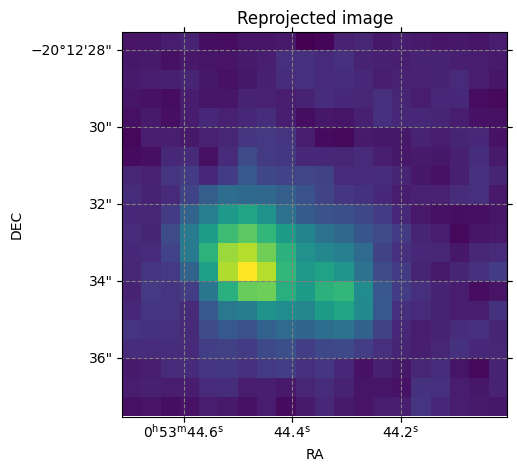

In [151]:
# header = hdul[0].header
# data = hdul[0].data

# Define the target WCS in ICRS
# Extract WCS information from the header
wcs = WCS(hdul.header)

target_wcs = WCS(naxis=2)
target_wcs.wcs.crpix = [10, 10]  # Reference pixel
target_wcs.wcs.cd = [[-0.5/3600, 0], [0, 0.5/3600]]  # Pixel scale
target_wcs.wcs.crval = [13.4349, -20.2091]  # Central coordinates (RA=0, DEC=0 in ICRS)
target_wcs.wcs.ctype = ["RA---TAN", "DEC--TAN"]  # ICRS tangent projection

# Reproject the image to the target WCS
reprojected_data, _ = reproject_interp(hdul, target_wcs, shape_out=(20, 20))

plt.figure(figsize=(10, 5))
ax1 = plt.subplot(1,1,1, projection=target_wcs)
ax1.imshow(reprojected_data, origin='lower')
ax1.coords.grid(color='white', linestyle='solid')
ax1.coords['ra'].set_axislabel('RA')
ax1.coords['dec'].set_axislabel('DEC')
ax1.set_title('Reprojected image')
plt.grid(True, color='gray', linestyle='--')
plt.show()
# plt.imshow(reprojected_data, origin='lower', vmin=-2.e-4, vmax=5.e-4)
# reprojected_data

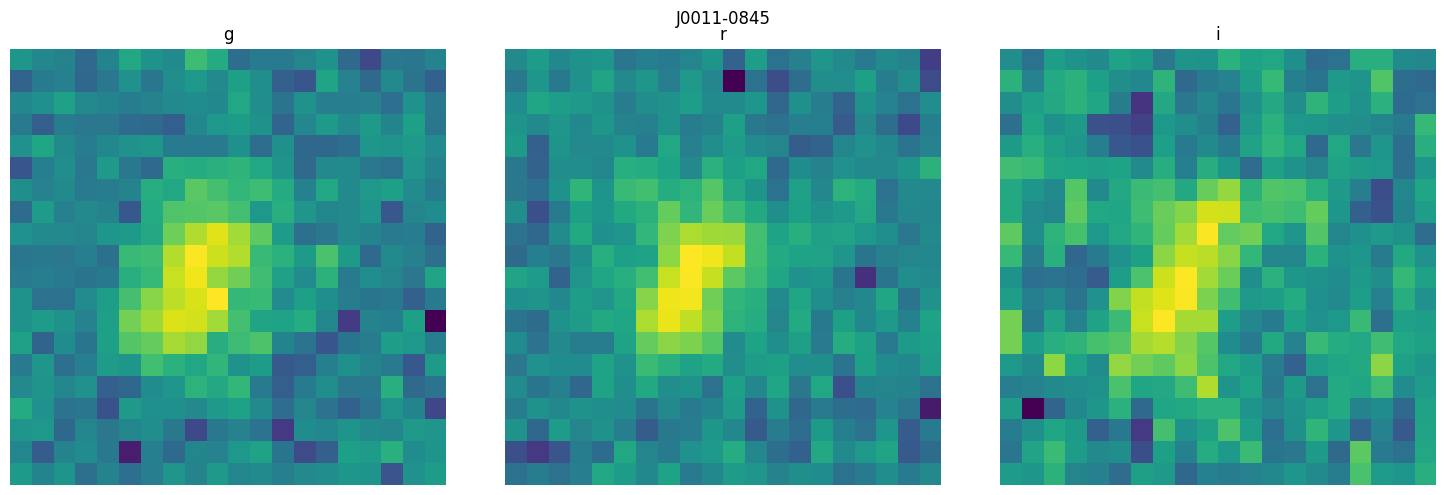

In [200]:
def transform_fits_image(hdul):
    header = hdul[0].header
    data = hdul[0].data

    # Define the target WCS in ICRS
    # Extract WCS information from the header
    wcs = WCS(header)

    # Reproject the image to the target WCS
    reprojected_data, footprint = reproject_interp((data, wcs), target_wcs, shape_out=data.shape)

    # Create a new FITS HDU
    hdu = fits.PrimaryHDU(reprojected_data, header=target_wcs.to_header())


    return hdu, footprint

# Note: If the WCS is already in ICRS, this step is not necessary.
target_wcs = WCS(naxis=2)
target_wcs.wcs.crpix = [11, 11]  # Reference pixel
# target_wcs.wcs.cd = w.wcs.cd  # Pixel scale
target_wcs.wcs.crval = [0, 0]  # Central coordinates (RA=0, DEC=0 in ICRS)
target_wcs.wcs.ctype = ["RA---TAN", "DEC--TAN"]  # ICRS tangent projection

for j, (name, row) in enumerate(df_gls.iterrows()):
    # print(j, name)
    if not row['smss']:
        df = pd.read_csv(f'data/known/table/{name}.csv')
        image_list = {}
        for i, band in enumerate(['g', 'r', 'i']):
            fits_name = f'data/known/fits/{name}_{band}.fits'
            if os.path.exists(fits_name):
                image_list[band] = fits.open(fits_name)
                continue
            cond = (df['band'] == band) & (df['exptime'] >=100)
            df_band = df[cond]
            if df_band.empty:
                continue
            idx = df_band['mean_fwhm'].idxmin()
            url = df_band.loc[idx, 'preview']
            hdul = url_img2fits(url)
            hdul.writeto(f'data/known/fits/{name}_{band}.fits', overwrite=True)
            image_list[band] = hdul[0]
            
        if len(image_list) != 3:
            continue

        target_wcs = WCS(naxis=2)
        target_wcs.wcs.crpix = [10, 10]  # Reference pixel
        target_wcs.wcs.cd = [[-0.5/3600, 0], [0, 0.5/3600]]  # Pixel scale
        target_wcs.wcs.crval = [row['RA'], row['DEC']]  # Central coordinates (RA=0, DEC=0 in ICRS)
        target_wcs.wcs.ctype = ["RA---TAN", "DEC--TAN"]  # ICRS tangent projection

        fig = plt.figure(figsize=(15, 5))
        ax1 = fig.add_subplot(131, projection=target_wcs.celestial)
        ax2 = fig.add_subplot(132, projection=target_wcs.celestial)
        ax3 = fig.add_subplot(133, projection=target_wcs.celestial)

        hdu_g, _ = reproject_interp(image_list['g'], target_wcs, shape_out=(20, 20))
        hdu_r, _ = reproject_interp(image_list['r'], target_wcs, shape_out=(20, 20))
        hdu_i, _ = reproject_interp(image_list['i'], target_wcs, shape_out=(20, 20))

        data_g = np.array(hdu_g.data)
        # data_g -= np.median(data_g)
        data_g -= data_g.min()

        data_r = np.array(hdu_r.data)
        # data_r -= np.median(data_r)
        data_r -= data_r.min()

        data_i = np.array(hdu_i.data)
        # data_i -= np.median(data_i)
        data_i -= data_i.min()

        try:
            ax1.imshow(data_g, origin='lower', norm=simple_norm(data_g, stretch='sqrt', max_percent=99.9))
            ax2.imshow(data_r, origin='lower', norm=simple_norm(data_r, stretch='sqrt', max_percent=99.9))
            ax3.imshow(data_i, origin='lower', norm=simple_norm(data_i, stretch='sqrt', max_percent=99.9))
            # rgb = make_lupton_rgb(data_i, data_r, data_g)
            # plt.imshow(rgb)
            plt.suptitle(name)
            
            ax1.set_title('g')
            ax2.set_title('r')
            ax3.set_title('i')

            ax1.axis('off')
            ax2.axis('off')
            ax3.axis('off')
            plt.tight_layout()
            plt.savefig(f'figs/known/{name}.png')
            plt.show()
        except:
            print(f'Error: {name}')
            continue
    break
    # if j == 10:
    #     break

# Get SMSS master table

In [7]:
df_known_gls = pd.read_csv('data/known_gls.csv')

In [ ]:
df_smss = None
for j, (name, row) in enumerate(df_known_gls.iterrows()):
    if not row['smss']:
        query = f"https://skymapper.anu.edu.au/sm-cone/public/query?RA={row['RA']}&DEC={row['DEC']}&SR=0.00277&CATALOG=dr4.master&RESPONSEFORMAT=CSV"
        res = requests.get(query)
        df = pd.read_csv(io.StringIO(res.text))
        if df.empty:
            continue
        df['gls_name'] = name
        if df_smss is None:
            df_smss = df
        else:
            df_smss = pd.concat([df_smss, df], ignore_index=True)
    # break
df_smss.to_csv('data/gls_smss.csv', index=False)

# Get WISE data

In [5]:
df_known_gls[['RA', 'DEC']].to_string('data/gls_coords.txt', index=False)

In [6]:
df_wise = pd.read_csv('data/table_irsa_catalog_search_results.csv')
df_wise

,cntr_01,dist_x,pang_x,ra_01,dec_01,designation,ra,dec,sigra,sigdec,...,w3m,w4nm,w4m,tmass_key,j_m_2mass,j_msig_2mass,h_m_2mass,h_msig_2mass,k_m_2mass,k_msig_2mass
0,1,0.301547,96.856764,2.834350,-8.764300,J001120.26-084551.5,2.834434,-8.764310,0.2341,0.2368,...,11,0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.243757,118.935835,3.348077,51.318300,J001323.56+511905.7,3.348172,51.318267,0.1340,0.1346,...,29,0,29,3.970766e+08,16.726,0.143,16.157,0.213,15.518,0.174
2,3,0.081423,131.949035,7.093690,6.531700,J002822.48+063154.0,7.093707,6.531685,0.1308,0.1355,...,12,1,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0.369621,116.372054,7.563600,-15.417700,J003015.28-152503.8,7.563695,-15.417746,0.1341,0.1364,...,13,0,13,1.189653e+09,16.698,0.157,15.719,0.169,15.291,0.166
4,5,0.395087,74.828079,11.946594,25.241100,J004747.21+251428.0,11.946711,25.241129,0.1535,0.1526,...,20,1,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,216,1.507571,160.701886,353.080500,-18.868500,J233219.35-185208.0,353.080646,-18.868895,0.1461,0.1443,...,12,0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,217,0.222173,66.358688,355.799750,-0.842860,J234311.95-005034.2,355.799806,-0.842835,0.1635,0.1648,...,10,1,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,218,0.036415,106.864688,356.070600,-30.940560,J234416.94-305626.0,356.070611,-30.940563,0.0770,0.0772,...,8,0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234,219,0.771044,32.267280,357.491900,-45.314700,J234958.09-451852.2,357.492063,-45.314519,0.1618,0.1677,...,17,0,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Gaia

In [4]:
Gaia.login(user=os.getenv("GAIANAME"), password=os.getenv("GAIAPASSW"))

INFO: Login to gaia TAP server [astroquery.gaia.core]
401 Error 401:
<!doctype html><html lang="en"><head><title>HTTP Status 401 – Unauthorized</title><style type="text/css">body {font-family:Tahoma,Arial,sans-serif;} h1, h2, h3, b {color:white;background-color:#525D76;} h1 {font-size:22px;} h2 {font-size:16px;} h3 {font-size:14px;} p {font-size:12px;} a {color:black;} .line {height:1px;background-color:#525D76;border:none;}</style></head><body><h1>HTTP Status 401 – Unauthorized</h1><hr class="line" /><p><b>Type</b> Status Report</p><p><b>Message</b> Bad Credentials</p><p><b>Description</b> The request has not been applied to the target resource because it lacks valid authentication credentials for that resource.</p><hr class="line" /><h3>Apache Tomcat/9.0.93</h3></body></html>


ERROR: Error logging in TAP server [astroquery.gaia.core]


In [ ]:

coords = SkyCoord(df_known_gls['RA'], df_known_gls['DEC'], unit=(u.deg, u.deg), frame='icrs')
r = Gaia.query_object_async(coordinate=coords, radius=5*u.arcsec)
r

In [96]:
coord = SkyCoord(ra=ra, dec=dec, unit=(u.degree, u.degree), frame='icrs')
width = u.Quantity(size, u.deg)
height = u.Quantity(size, u.deg)
r = Gaia.query_object_async(coordinate=coord, width=width, height=height)

r.pprint(max_lines=12, max_width=130)

INFO: Query finished. [astroquery.utils.tap.core]
         dist             solution_id             DESIGNATION          ... ebpminrp_gspphot_upper libname_gspphot
                                                                       ...          mag                          
--------------------- ------------------- ---------------------------- ... ---------------------- ---------------
4.956855076532387e-05 1636148068921376768 Gaia DR3 2497538124168131968 ...                     --                
0.0002556219639077938 1636148068921376768 Gaia DR3 2497538124167717248 ...                     --                


In [97]:
r

dist,solution_id,DESIGNATION,SOURCE_ID,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / um,1 / um,1 / um,,,,,,,,mas,,,,,deg,,,,,,,,deg,deg,deg,deg,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,,,,,mag,mag,mag,km / s,km / s,,,,,,,,d,km / s,K,log(cm.s**-2),dex,,km / s,km / s,,mag,mag,,,,deg,deg,deg,deg,,,,,,,,,,,,,,,K,K,K,log(cm.s**-2),log(cm.s**-2),log(cm.s**-2),dex,dex,dex,pc,pc,pc,mag,mag,mag,mag,mag,mag,mag,mag,mag,
float64,int64,object,int64,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,int16,int16,int16,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,float32,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,fl

# Get SMSS object information

In [8]:
df_smss = pd.read_csv('data/gls_smss.csv')

In [9]:
df_known_gls['z_qso'] = df_known_gls['z_qso'].replace('-', np.nan).astype(float)

In [10]:
df_merged = pd.merge(df_known_gls, df_smss, left_on='Name', right_on='gls_name')
df_merged

,RA,DEC,Name,z_qso,z_lens,separation,N_images,W1,W2,smss,...,e_i_apc05,z_psf,e_z_psf,z_petro,e_z_petro,z_apc05,e_z_apc05,self_dist1,self_id1,gls_name
0,2.83435,-8.76430,J0011-0845,1.700,-,1.89,2,15.190,14.455,False,...,0.0953,NaN,NaN,NaN,NaN,NaN,NaN,15.00,NaN,J0011-0845
1,7.09369,6.53170,PSJ0028+0631,1.060,-,2.81,2,14.160,13.363,False,...,0.0449,NaN,NaN,NaN,NaN,NaN,NaN,15.00,NaN,PSJ0028+0631
2,7.56360,-15.41770,PSJ0030-1525,3.360,measured,1.78,4,14.312,13.761,False,...,0.0607,17.8279,0.1616,17.7566,0.0791,17.7782,0.0615,15.00,NaN,PSJ0030-1525
3,12.61580,-17.66930,HE0047-1756,1.678,0.407,1.43,2,12.911,11.586,False,...,0.0293,16.1183,0.0204,16.0779,0.0169,16.1023,0.0238,2.51,2.021440e+09,HE0047-1756
4,12.61580,-17.66930,HE0047-1756,1.678,0.407,1.43,2,12.911,11.586,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.51,1.209635e+07,HE0047-1756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,353.08050,-18.86850,PSJ2332-1852,1.490,-,1.97,2,14.744,13.787,False,...,0.0427,18.4042,0.1330,18.1619,0.1377,18.4266,0.0575,15.00,NaN,PSJ2332-1852
120,355.79975,-0.84286,ULASJ2343-0050,0.787,0.3,1.32,2,14.647,13.686,False,...,0.0406,18.9413,0.0986,19.1543,0.2102,18.9292,0.0762,9.49,8.692570e+06,ULASJ2343-0050
121,355.79975,-0.84286,ULASJ2343-0050,0.787,0.3,1.32,2,14.647,13.686,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.49,8.692571e+06,ULASJ2343-0050
122,356.07060,-30.94056,WISE2344-3056,1.298,1.30,2.18,4,14.758,13.889,False,...,0.0370,19.0262,0.2243,19.2248,0.1650,19.2683,0.1654,15.00,NaN,WISE2344-3056


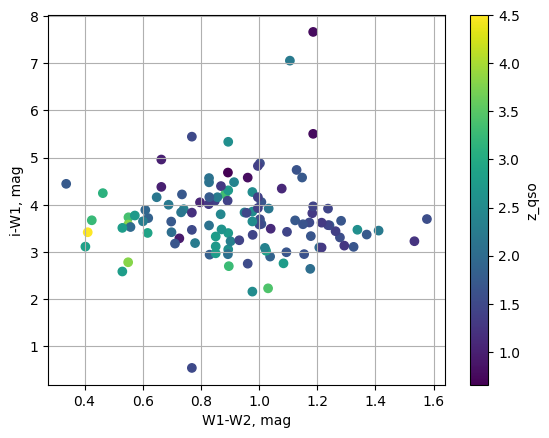

In [11]:
plt.scatter(df_merged['W1']- df_merged['W2'],
            df_merged['i_psf'] - df_merged['W1'],
            c=df_merged['z_qso']
            )
plt.grid()
plt.xlabel('W1-W2, mag')
plt.ylabel('i-W1, mag')
plt.colorbar(label='z_qso')
plt.show()

Text(0.5, 0, 'C')

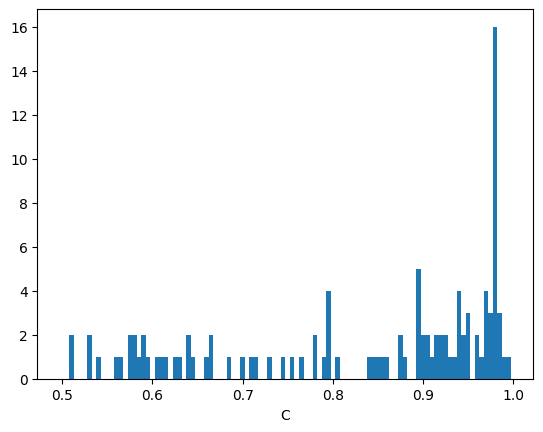

In [13]:
nrange=(0.5, 1)
nbins=100
hist, bins = np.histogram(df_merged['class_star'], bins=nbins, range=nrange)
w = bins[1]-bins[0]
plt.bar(bins[:-1], hist, width=w)
plt.xlabel('C')

In [15]:
hdul = fits.open('data/known/fits/Q1355-2257_i.fits')
hdul.info()

Filename: data/known/fits/Q1355-2257_i.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     157   (22, 22)   float32   


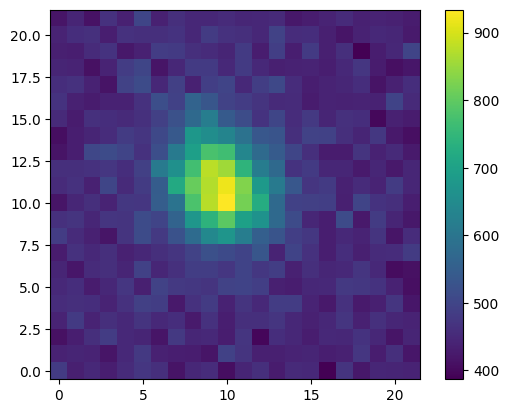

In [ ]:
hdul[0].data.max()
plt.imshow(hdul[0].data, origin='lower')
plt.isop
plt.colorbar()